## Step 3: Exploratory Data Analysis

#### Installing plotly

In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
pio.renderers.default='browser'
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Importing table for EDA

The following is resultant table of web scraping and data cleaning imported from player_mvp_stats.csv.

In [3]:
stats = pd.read_csv("player_mvp_stats.csv", index_col=0)

In [4]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,0.484,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,0.286,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,0.470,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,0.459,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


#### Rudimentary Analysis of the data frame

In [5]:
# Find top 5 results from the table
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


In [6]:
# Printing basic info about the table
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14092 entries, 0 to 14091
Data columns (total 41 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14092 non-null  object 
 1   Pos      14092 non-null  object 
 2   Age      14092 non-null  int64  
 3   Tm       14092 non-null  object 
 4   G        14092 non-null  int64  
 5   GS       14092 non-null  int64  
 6   MP       14092 non-null  float64
 7   FG       14092 non-null  float64
 8   FGA      14092 non-null  float64
 9   FG%      14042 non-null  float64
 10  3P       14092 non-null  float64
 11  3PA      14092 non-null  float64
 12  3P%      12050 non-null  float64
 13  2P       14092 non-null  float64
 14  2PA      14092 non-null  float64
 15  2P%      14008 non-null  float64
 16  eFG%     14042 non-null  float64
 17  FT       14092 non-null  float64
 18  FTA      14092 non-null  float64
 19  FT%      13630 non-null  float64
 20  ORB      14092 non-null  float64
 21  DRB      140

In [7]:
# Print summary stats of each feature in the table
stats.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
count,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14042.000000,14092.000000,14092.000000,12050.000000,...,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000,14092.000000
mean,26.750568,52.595586,25.625816,20.379783,3.097005,6.885531,0.438541,0.539015,1.546225,0.275111,...,6.596225,38.792932,0.005719,39.567840,40.081890,0.496628,15.669635,100.689604,100.798120,-0.105202
std,4.242542,25.101975,29.069866,10.115839,2.204090,4.638717,0.092643,0.674970,1.777399,0.162502,...,67.841599,208.941452,0.058533,12.899535,12.857063,0.155606,13.155088,6.780205,6.876564,4.568400
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000
25%,23.000000,33.000000,1.000000,12.000000,1.400000,3.200000,0.401000,0.000000,0.100000,0.200000,...,0.000000,0.000000,0.000000,30.000000,30.000000,0.378000,3.500000,95.800000,96.000000,-3.300000
50%,26.000000,59.000000,11.000000,19.800000,2.600000,5.800000,0.440000,0.300000,0.900000,0.321000,...,0.000000,0.000000,0.000000,41.000000,39.500000,0.512000,14.000000,99.900000,100.500000,-0.015000
75%,30.000000,75.000000,51.000000,28.800000,4.400000,9.700000,0.482000,0.900000,2.600000,0.372000,...,0.000000,0.000000,0.000000,49.000000,49.000000,0.610000,25.000000,104.900000,105.400000,3.187500
max,44.000000,85.000000,83.000000,43.700000,12.700000,27.800000,1.000000,5.300000,13.200000,1.000000,...,1310.000000,1310.000000,1.000000,73.000000,72.000000,0.890000,56.000000,120.100000,130.800000,11.800000


In [8]:
# Checking to find any duplicate values
# The sum would give the count of duplicates (if any)
stats.duplicated().sum()

0

In [9]:
# Find null values in the data
stats.isnull().sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [10]:
# Replacing null values
stats.replace(np.nan,'0',inplace = True)
 
# Checking if changes reflected
stats.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

## Applying filters to the data frame

#### Finding out which of the players has greater than 40 Minutes Played a game on average

In [11]:
# Filtering the data to find out which players had more than 40 minutes played per game on average
stats[stats['MP'] > 40]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
43,Dan Majerle,SG,28,PHO,80,76,40.1,6.0,14.2,0.418,...,0.0,0.000,Phoenix Suns,56,26,0.683,7.0,108.2,103.4,4.68
113,Michael Finley,SF,24,DAL,82,82,41.4,8.2,18.4,0.449,...,1160.0,0.001,Dallas Mavericks,20,62,0.244,42.0,91.4,97.5,-6.33
127,Michael Finley,SF,25,DAL,50,50,41.0,7.8,17.5,0.444,...,0.0,0.000,Dallas Mavericks,19,31,0.380,18.0,91.6,94.0,-2.50
149,Anthony Mason,PF,34,MIA,80,80,40.7,5.8,11.9,0.482,...,1240.0,0.001,Miami Heat,50,32,0.610,6.0,88.9,86.6,1.73
225,Ron Mercer,SG,24,CHI,61,61,41.6,8.2,18.4,0.446,...,0.0,0.000,Chicago Bulls,15,67,0.183,37.0,87.6,96.7,-9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888,Dahntay Jones,SF,35,CLE,1,0,42.0,6.0,14.0,0.429,...,0.0,0.000,Cleveland Cavaliers,57,25,0.695,0.0,104.3,98.3,5.45
13210,Chris Webber,PF,25,SAC,42,42,40.9,9.0,18.5,0.486,...,1180.0,0.043,Sacramento Kings,27,23,0.540,8.0,100.2,100.6,-0.89
13458,Jalen Rose,SF,30,CHI,82,82,40.9,7.8,19.3,0.406,...,0.0,0.000,Chicago Bulls,30,52,0.366,20.0,95.0,100.1,-5.31
13532,Cuttino Mobley,SG,26,HOU,74,74,42.1,8.0,18.4,0.438,...,0.0,0.000,Houston Rockets,28,54,0.341,30.0,92.3,97.2,-4.31


#### Finding out who the oldest players to ever play in the league are

In [12]:
above25 = stats[stats['Age'] > 25]
stats.sort_values(by=['Age'], ascending=False).head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9513,Kevin Willis,PF,44,DAL,5,0,8.6,1.0,2.6,0.385,...,0.0,0.0,Dallas Mavericks,67,15,0.817,0.0,100.0,92.8,7.28
10526,Robert Parish,C,43,CHI,43,3,9.4,1.6,3.3,0.49,...,0.0,0.0,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
11719,Vince Carter,PF,43,ATL,60,0,14.6,1.8,5.1,0.352,...,0.0,0.0,Atlanta Hawks,20,47,0.299,21.0,111.8,119.7,-7.71
2301,Kevin Willis,C,42,ATL,29,5,11.9,1.2,3.1,0.389,...,0.0,0.0,Atlanta Hawks,13,69,0.159,46.0,92.7,102.5,-9.62
3841,Vince Carter,PF,42,ATL,76,9,17.5,2.6,6.2,0.419,...,0.0,0.0,Atlanta Hawks,29,53,0.354,13.0,113.3,119.4,-6.06


## Univariate Analysis

#### Bar graphs that shows how many players have played for a team over the years

In [13]:
fig = px.bar(
    stats.groupby(
        'Team', as_index=False
    )[['Player']].count(), y="Player", x='Team'
)
fig.show()

#### Representing the number of players for a team over the years in a pie chart

In [14]:
fig = px.pie(stats.groupby('Team', as_index=False)[['Player']].count(), values="Player",names = 'Team')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()


#### Representing the number of wins a team has had over the years in a pie chart

In [15]:


fig = px.pie(stats.groupby('Players', as_index=False)[['W/L%']].count(), values="W",names = 'Team')

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

KeyError: 'Players'

In [ ]:
stats['W']

0        58
1        58
2        58
3        58
4        58
         ..
14087    42
14088    42
14089    42
14090    42
14091    42
Name: W, Length: 14092, dtype: int64

## Multivariate Analysis

In [17]:
correlation = stats.corr()
correlation

,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
Age,1.000000,0.049801,0.047401,0.077615,0.004410,0.006731,0.052025,0.038381,-0.012868,-0.009498,...,0.017399,0.041223,0.018596,0.168263,-0.163908,0.173677,-0.135908,-0.054638,-0.168775,0.166654
G,0.049801,1.000000,0.619272,0.658079,0.551835,0.531982,0.290662,0.276552,0.516812,0.505423,...,0.088981,0.151223,0.089282,0.127100,-0.028226,0.081173,-0.043886,0.001696,-0.055997,0.083440
GS,0.047401,0.619272,1.000000,0.830615,0.758387,0.740486,0.343211,0.339864,0.729808,0.724261,...,0.166774,0.295885,0.167476,0.059374,-0.015470,0.038914,-0.021824,-0.005544,-0.032408,0.039117
MP,0.077615,0.658079,0.830615,1.000000,0.897037,0.901098,0.490870,0.499042,0.834171,0.842594,...,0.161669,0.294632,0.162175,-0.020897,0.028252,-0.025638,0.028732,-0.026831,-0.009518,-0.025013
FG,0.004410,0.551835,0.758387,0.897037,1.000000,0.981849,0.477040,0.482603,0.953928,0.945975,...,0.273182,0.419220,0.276365,0.015344,-0.004811,0.010331,-0.002553,0.068605,0.059272,0.012615
FGA,0.006731,0.531982,0.740486,0.901098,0.981849,1.000000,0.552338,0.570240,0.908101,0.927660,...,0.246813,0.393012,0.249254,-0.016090,0.022899,-0.020354,0.022868,0.036295,0.048851,-0.018913
3P,0.052025,0.290662,0.343211,0.490870,0.477040,0.552338,1.000000,0.984354,0.192010,0.208113,...,0.095945,0.139994,0.096225,0.034559,-0.052952,0.044304,-0.060695,0.191877,0.157172,0.046280
3PA,0.038381,0.276552,0.339864,0.499042,0.482603,0.570240,0.984354,1.000000,0.203153,0.222380,...,0.095447,0.142055,0.096460,0.014372,-0.036072,0.024785,-0.046652,0.193347,0.172599,0.025843
2P,-0.012868,0.516812,0.729808,0.834171,0.953928,0.908101,0.192010,0.203153,1.000000,0.985473,...,0.272517,0.420640,0.275976,0.005376,0.012632,-0.003523,0.017807,0.011351,0.012742,-0.001663
2PA,-0.009498,0.505423,0.724261,0.842594,0.945975,0.927660,0.208113,0.222380,0.985473,1.000000,...,0.249452,0.401804,0.251885,-0.025692,0.043642,-0.035508,0.048380,-0.044614,-0.020241,-0.034248


In [18]:
# Plotting the correlation heatmap 
fig = px.imshow(correlation, text_auto=True)
fig.show()

In [ ]:
# Plotting the scatter plot between minutes played and field goals
fig = px.scatter(stats, x='MP', y='FG',trendline = 'ols')
fig.show()

In [ ]:
# Plotting the scatter plot between 3 points made and offensive rebounds
fig = px.scatter(stats, x='3P', y='ORB',trendline = 'ols')
fig.show()

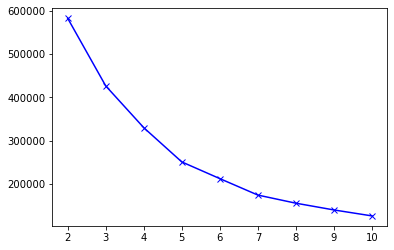

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

temp = stats[["FGA","Year"]]

Sum_of_squared_distances = []
Scores = []
for i in range(2,11):
    Kmodel = KMeans(n_clusters = i).fit(temp)
    Scores.append(metrics.silhouette_score(temp, Kmodel.labels_, metric='euclidean'))
    Sum_of_squared_distances.append(Kmodel.inertia_)
Kmodel = KMeans(n_clusters = Scores.index(max(Scores)) + 2).fit(temp)
fig = px.scatter(temp,x=temp['FGA'],y=temp['Year'],color=Kmodel.labels_)
fig.show()
plt.plot(range(2,11),Sum_of_squared_distances,'bx-')
